In [158]:
map_shape=(64,64)
x_dim, y_dim = size
map_array = np.zeros(size)

    


NameError: name 'size' is not defined

In [4]:
n_anchors = 5
start_idx = np.random.randint(64, size=(n_anchors, 2))
n_moves = 20
map_array = np.zeros(size)
for idx in start_idx:
    position = idx
    map_array[idx[0], idx[1]] = 1
    direction = np.random.choice([-1,1], 2)
    
    for move in range(n_moves):
        should_move = True
        while should_move:
            if np.random.rand() > 0.95:
                direction = np.random.choice([-1,0,1], 2)

            possible_dir = position + direction 
            if not (np.sum(possible_dir > map_array.shape[0]-1) or np.sum(possible_dir < 0)):
                if map_array[possible_dir[0], possible_dir[1]] == 1:
                    continue
                position = possible_dir
                map_array[possible_dir[0], possible_dir[1]] = 1
                should_move = False
        
plt.imshow(map_array)

NameError: name 'np' is not defined

In [5]:
def random_map(map_shape=(16,16)):
    x_dim, y_dim = map_shape
    map_array = np.zeros(map_shape)

    n_anchors = 6
    start_idx = np.random.randint(map_shape[0], size=(n_anchors, 2))
    n_moves = 20
    map_array = np.zeros(map_shape)
    start_position = map_array[0,0] = 2
    end_position = map_array[-1,-1] = 3

    for idx in start_idx:
        position = idx
        map_array[idx[0]-2:idx[0], idx[1]-2:idx[1]] = 1

    plt.imshow(map_array)
    return map_array

In [11]:
random_map()

NameError: name 'plt' is not defined

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import baselines.ppo2
import baselines.common 
import baselines.common.vec_env
%matplotlib inline

In [16]:
baselines.common.vec_env.

baselines.common.vec_env.VecEnv

In [156]:
LEFT = 0
UP = 3
RIGHT = 1
DOWN = 2

class GridEnv():
    def __init__(self):
        self.state = random_map()
        self.start_state = [0,0]
        self.position = [0,0]
        self.end_state = [-1,-1]
        self.path = [self.start_state]
        
    def _move(self, row, col, a):
            ncol = nrow = self.state.shape[0]
            new_row = row
            new_col = col
            if a==0: # left
                new_col = max(col-1,0)
            elif a==1: # down
                new_row = min(row+1,nrow-1)
            elif a==2: # right
                new_col = min(col+1,ncol-1)
            elif a==3: # up
                new_row = max(row-1,0)
            return (new_row, new_col)
        
    def step(self, action):
        new_position = self._move(*self.position, action)
        #current_map[new_position[0], new_position[1]] = 0
        if self.state[new_position[1], new_position[0]] == 1:
            print(new_position)
            new_position = self.position
            assert new_position == self.position
        self.path.append(new_position)
            
        self.position = new_position
        if self.state[new_position[0], new_position[1]] == 3:
            complete = True
            print("DONE")
        else:
            complete = False
        
        return new_position, complete
    
    def render(self, mode='human'):
        current_map = self.state.copy()
        #current_map[self.position[0], self.position[1]] = 4
        path = np.array(self.path)
        plt.plot(*path.T, 'o')
        plt.imshow(current_map, cmap='gray')
    

DONE
59


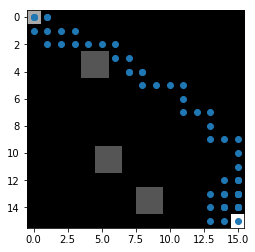

In [160]:

env = GridEnv()
probs = np.array([2,2,5,5])
probs =  probs/probs.sum()

for i in range(10000):
    choice = np.random.choice([LEFT, UP, RIGHT, DOWN], p=probs)
    out, complete = env.step(choice)
    if complete:
        break
    
env.render()
print(i)


In [83]:

probs = np.array([2,2,5,5])
probs =  probs/probs.sum()

In [84]:
probs

array([0.14285714, 0.14285714, 0.35714286, 0.35714286])

In [126]:
env.state

array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [361]:
class Policy(nn.Module):
    def __init__(self, map_size):
        super(Policy, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, bias=True, padding=1),
            nn.ReLU(True),
            nn.Conv2d(4, 4, kernel_size=3, bias=True, padding=1),
            nn.ReLU(True),
            nn.Conv2d(4, 1, kernel_size=1, bias=True),
            nn.ReLU(True),
        )

        self.fc = nn.Linear(256, 4)

        self.saved_log_probs = []
        self.rewards = []

    def forward(self, x):
        x_int = self.net(x).view(1, -1)
        x_int = self.fc(x_int)
        
        action_scores = x_int
        return F.softmax(action_scores, dim=1)


In [362]:
test_net = Policy((16,16))

In [363]:
tnet = nn.Conv2d(1, 4, kernel_size=3, bias=True, padding=1)
test_input = torch.Tensor(1, 1, 16, 16).uniform_(0, 1)
test_input_v = Variable(test_input)
out = test_net(test_input_v)

In [386]:
actions = torch.distributions.Categorical(probs=out)
choice = actions.sample().data.numpy()
env.step(choice)

((13, 10), False)

In [389]:
rewards = np.zeros(100)
rewards[-1] = 10
rewards - rewards.mean() / (rewards.std())

array([-0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10050378,
       -0.10050378, -0.10050378, -0.10050378, -0.10050378, -0.10

In [316]:
#test_input = torch.Tensor(1, 4).uniform_(0, 1)
#test_input_v = Variable(test_input)
#out = test_net(test_input_v)
# Reinforce
        

ValueError: Expected 4D tensor as input, got 2D tensor instead.

In [216]:
polict_network = test_network
probs = policy_network(state)
# Note that this is equivalent to what used to be called multinomial
m = Categorical(probs)
action = m.sample()
next_state, reward = env.step(action)
loss = -m.log_prob(action) * reward
loss.backward()

NameError: name 'test_network' is not defined

In [213]:
actions.sample()

Variable containing:
 1
[torch.LongTensor of size 1]

NameError: name 'action_scores' is not defined

In [194]:
actions.sample()

RuntimeError: invalid argument 2: invalid multinomial distribution (encountering probability entry < 0) at /opt/conda/conda-bld/pytorch_1518243271935/work/torch/lib/TH/generic/THTensorRandom.c:280

In [10]:
import argparse
import gym
import numpy as np
from itertools import count

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.distributions import Categorical


parser = argparse.ArgumentParser(description='PyTorch REINFORCE example')
parser.add_argument('--gamma', type=float, default=0.99, metavar='G',
                    help='discount factor (default: 0.99)')
parser.add_argument('--seed', type=int, default=543, metavar='N',
                    help='random seed (default: 543)')
parser.add_argument('--render', default=True, action='store_true',
                    help='render the environment')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='interval between training status logs (default: 10)')
args = parser.parse_args([])

env = gym.make('CartPole-v0')
env.seed(args.seed)
torch.manual_seed(args.seed)


class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.affine1 = nn.Linear(4, 128)
        self.affine2 = nn.Linear(128, 2)

        self.saved_log_probs = []
        self.rewards = []

    def forward(self, x):
        x = F.relu(self.affine1(x))
        action_scores = self.affine2(x)
        return F.softmax(action_scores, dim=1)


policy = Policy()
optimizer = optim.Adam(policy.parameters(), lr=1e-2)


def select_action(state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    probs = policy(Variable(state))
    m = Categorical(probs)
    action = m.sample()
    policy.saved_log_probs.append(m.log_prob(action))
    return action.data[0]


def finish_episode():
    R = 0
    policy_loss = []
    rewards = []
    for r in policy.rewards[::-1]:
        R = r + args.gamma * R
        rewards.insert(0, R)
    rewards = torch.Tensor(rewards)
    rewards = (rewards - rewards.mean()) / (rewards.std() + np.finfo(np.float32).eps)
    for log_prob, reward in zip(policy.saved_log_probs, rewards):
        policy_loss.append(-log_prob * reward)
    optimizer.zero_grad()
    policy_loss = torch.cat(policy_loss).sum()
    policy_loss.backward()
    optimizer.step()
    del policy.rewards[:]
    del policy.saved_log_probs[:]


def main():
    running_reward = 10
    for i_episode in count(1):
        state = env.reset()
        for t in range(100):  # Don't infinite loop while learning
            action = select_action(state)
            state, reward, done, _ = env.step(action)
            if args.render:
                env.render()
            policy.rewards.append(reward)
            if done:
                break

        running_reward = running_reward * 0.99 + t * 0.01
        finish_episode()
        if i_episode % args.log_interval == 0:
            print('Episode {}\tLast length: {:5d}\tAverage length: {:.2f}'.format(
                i_episode, t, running_reward))
        if running_reward > env.spec.reward_threshold:
            print("Solved! Running reward is now {} and "
                  "the last episode runs to {} time steps!".format(running_reward, t))
            break


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [ ]:
import argparse
import gym
import numpy as np
from itertools import count

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.distributions import Categorical


parser = argparse.ArgumentParser(description='PyTorch REINFORCE example')
parser.add_argument('--gamma', type=float, default=0.99, metavar='G',
                    help='discount factor (default: 0.99)')
parser.add_argument('--seed', type=int, default=543, metavar='N',
                    help='random seed (default: 543)')
parser.add_argument('--render', default=True, action='store_true',
                    help='render the environment')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='interval between training status logs (default: 10)')
args = parser.parse_args([])

env = gym.make('CartPole-v0')
env.seed(args.seed)
torch.manual_seed(args.seed)


class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.affine1 = nn.Linear(4, 128)
        self.affine2 = nn.Linear(128, 2)

        self.saved_log_probs = []
        self.rewards = []

    def forward(self, x):
        x = F.relu(self.affine1(x))
        action_scores = self.affine2(x)
        return F.softmax(action_scores, dim=1)


policy = Policy()
optimizer = optim.Adam(policy.parameters(), lr=1e-2)


def select_action(state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    probs = policy(Variable(state))
    m = Categorical(probs)
    action = m.sample()
    policy.saved_log_probs.append(m.log_prob(action))
    return action.data[0]


def finish_episode():
    R = 0
    policy_loss = []
    rewards = []
    for r in policy.rewards[::-1]:
        R = r + args.gamma * R
        rewards.insert(0, R)
    rewards = torch.Tensor(rewards)
    rewards = (rewards - rewards.mean()) / (rewards.std() + np.finfo(np.float32).eps)
    for log_prob, reward in zip(policy.saved_log_probs, rewards):
        policy_loss.append(-log_prob * reward)
    optimizer.zero_grad()
    policy_loss = torch.cat(policy_loss).sum()
    policy_loss.backward()
    optimizer.step()
    del policy.rewards[:]
    del policy.saved_log_probs[:]


def main():
    running_reward = 10
    for i_episode in count(1):
        state = env.reset()
        for t in range(100):  # Don't infinite loop while learning
            action = select_action(state)
            state, reward, done, _ = env.step(action)
            if args.render:
                env.render()
            policy.rewards.append(reward)
            if done:
                break

        running_reward = running_reward * 0.99 + t * 0.01
        finish_episode()
        if i_episode % args.log_interval == 0:
            print('Episode {}\tLast length: {:5d}\tAverage length: {:.2f}'.format(
                i_episode, t, running_reward))
        if running_reward > env.spec.reward_threshold:
            print("Solved! Running reward is now {} and "
                  "the last episode runs to {} time steps!".format(running_reward, t))
            break


In [ ]:
main()